In [1]:
print("Hello")

Hello


In [2]:
import requests

In [3]:
facebook_val = requests.get("https://graph.facebook.com/v2.7/10152460834423273_10156397828618273/reactions?limit=600&__paging_token=enc_AdC0e5dvKoSQmXJylWG9ZCB2HOcqrn0h8aKiZAXhZAWwspwXXGbMQrctxddQsukemXMFmPC1MVhZCLW74QdPJf5Xeo7M&since=1510280679&access_token=EAACEdEose0cBACyiuxUe4SdZBwW6ZAbbKQOU6j12PCIZBf4LcGf15VZBmBzY7kUtYXGdj8PSa8CP44G49ZCoS0E5fqURfB0hZCwKwAS1ZBZBjeIhYssiOOpOT8uDJAe2XHMUl0IwoDD5xl1ZBEkAUW0xNIcUCC2mmZAyl1obonSKAZCl2wqFiKf97qhlFIZCBmqhyAsZD")

In [4]:
facebook_val.content

b'{"error":{"message":"Error validating access token: Session has expired on Sunday, 19-Nov-17 09:00:00 PST. The current time is Sunday, 26-Nov-17 12:45:37 PST.","type":"OAuthException","code":190,"error_subcode":463,"fbtrace_id":"Aug+R6ZN7mo"}}'

In [9]:
type(facebook_val.content)

bytes

In [5]:
facebook_val.json() # You cant see the contents anymore :) 

{'error': {'code': 190,
  'error_subcode': 463,
  'fbtrace_id': 'Aug+R6ZN7mo',
  'message': 'Error validating access token: Session has expired on Sunday, 19-Nov-17 09:00:00 PST. The current time is Sunday, 26-Nov-17 12:45:37 PST.',
  'type': 'OAuthException'}}

In [17]:
type(facebook_val.json())

dict

In [32]:
reactions = {}

In [33]:
for i in facebook_val.json()['data']:
    reactions[i['name']]=i['type']


In [8]:
print("Nothing")

Nothing


In [42]:
import operator

In [43]:
sorted_x = sorted(reactions.items(), key=operator.itemgetter(1))


In [49]:
for k,v in sorted_x:
    print(k)

<list of names>

In [1]:
%%file facebook_reactions.py
import operator
import requests
import numpy as np
import pandas as pd
import csv


#Write classes
access_token="EAACEdEose0cBABDc6me35tlENBUkIWY0BCPpJx7fhbbO4m0ZCdKWtXgbDZAZCwp4bxVQmrAakXeChgDS7vubrmMwmVzuRPfP3zZC5F2tqZAWtJ8auaxV1aCAJZACLvSgV5BWEIyY9rB3h1ayCTkxwBHAZC2VFuR9U5V208cZC5IPvCRDZCR61YvoKWoQZC5vw7TE5I589dMIq5BgZDZD"
time_wanted = "1265371201"
def re2(gimme):
    res2="https://graph.facebook.com/v2.6/"+gimme+"/reactions?limit=600&__paging_token=enc_AdAXF9uurmVoZAXBLO2BIn3Ez0sc1wUeMiv5RIKFpwaZA6fVYJdP8sntFKBMfa0hepR1yBDtZB4ahrlm6I7b0p9qGJE&access_token="+access_token
    return requests.get(res2)


    
feed_url = "https://graph.facebook.com/v2.5/10152460834423273/feed?limit=25&__paging_token=enc_AdC0e5dvKoSQmXJylWG9ZCB2HOcqrn0h8aKiZAXhZAWwspwXXGbMQrctxddQsukemXMFmPC1MVhZCLW74QdPJf5Xeo7M&access_token="+access_token+"&&until="+time_wanted
cnttt = 0
def do_this(feed_url,cnttt):
    call_feed_url = requests.get(feed_url)
    #Ensuring success

    if call_feed_url.status_code == 200:
        statuses = {}
        counter = 0
        for i in call_feed_url.json()['data']:
            lis = []
            lis.append(i['id'])
            lis.append(i['created_time'])
            if 'message' in i:
                lis.append(i['message'])
            elif 'story' in i:
                lis.append(i['story'])
            statuses[counter]=lis
            counter = counter+1
    li = []
    for i in statuses.values():
        li.append(i)

#    for i in li:       
        #print(i[0],"|",i[1],"|",i[2])
    if call_feed_url.status_code == 200:
        for i in li:
            if "10152460834423273" in i[0]:
                likesval = re2(i[0])
                resp_parse = likesval.json()
                x=np.array(resp_parse)
                likes = len(x.all()["data"])
                #print(likes,i[1])
                with open('./test2.csv','a',newline='', encoding="utf-8") as csvfile:
                    spamwriter = csv.writer(csvfile,delimiter=' ',quotechar='|',quoting=csv.QUOTE_MINIMAL)
                    spamwriter.writerow(str(likes)+","+(i[1]))
        
        if cnttt <12:
            cnttt = cnttt +1
            do_this(call_feed_url.json()["paging"]["next"],cnttt)
        
cnttt = 0
do_this(feed_url,cnttt)

Overwriting facebook_reactions.py


In [69]:
li=[]
for i in reactions.values():
    li.append(i)

In [70]:
li[:10]

['HAHA', 'LIKE', 'HAHA', 'LIKE', 'HAHA', 'LIKE', 'LIKE', 'SAD', 'HAHA', 'LIKE']

In [74]:
%%python3 facebook_reactions.py

UsageError: %%python3 is a cell magic, but the cell body is empty.


In [76]:
feed_url = "https://graph.facebook.com/v2.5/10152460834423273/feed?limit=100&__paging_token=enc_AdC0e5dvKoSQmXJylWG9ZCB2HOcqrn0h8aKiZAXhZAWwspwXXGbMQrctxddQsukemXMFmPC1MVhZCLW74QdPJf5Xeo7M&since=1510280679&access_token=EAACdEose0cBACyiuxUe4SdZBwW6ZAbbKQOU6j12PCIZBf4LcGf15VZBmBzY7kUtYXGdj8PSa8CP44G49ZCoS0E5fqURfB0hZCwKwAS1ZBZBjeIhYssiOOpOT8uDJAe2XHMUl0IwoDD5xl1ZBEkAUW0xNIcUCC2mmZAyl1obonSKAZCl2wqFiKf97qhlFIZCBmqhyAsZD"


In [77]:
call_feed_url = requests.get(feed_url)


In [83]:
for i in call_feed_url.json()['data']:
    if 'message' in i:
        print(i['message'])

li=[]
for i in reactions.values():
    li.append(i)

Confirmation bias aside, this is a really nice article to read :) 

#tldr? #WorkHard #StayHappy
Saw a girl on the Metro wearing  sneakers similar to mine.

Hey sole sister!😌
You can't completely be from Spain. You can only be Span-ish.
Saw a surly kid looking out the window of his dad's car growing increasingly impatient in the backseat as they inched through traffic on MG Road.
Wouldn't be surprised if he went home and started writing a book titled "Kid's Kampf".
"Garb" is clothing. But "Garbage" is trash 🤔 I guess everything goes bad over time
I see people traveling far and wide and I'm wondering.. Kaise yaar o.o I get tired just by looking at places on Google Maps :-/

#wonderlust
What do monks use when they get a back ache?

Zendu Balm 🤔😌

#LateNightThoughts
For research purposes
Dat dopamine tho.
You Know Puliyogare/ Puliyodharai was way ahead of its time coz there's a "Yo" in the name. 🤘😌
Who called it consumer study and not buyology?
When your doodle is shitty but you are delusi

In [101]:
re1 = "https://graph.facebook.com/v2.5/10152460834423273/feed?limit=25&__paging_token=enc_AdAXF9uurmVoZAXBLO2BIn3Ez0sc1wUeMiv5RIKFpwaZA6fVYJdP8sntFKBMfa0hepR1yBDtZB4ahrlm6I7b0p9qGJE&access_token=EAACEdEose0cBADamPVA31qDpt8h4aHFwCMLnZBi1BootdvmP54SqkPE5GZARzpIMWUIHXzEEznZBBS8zsf32ZCzN0UBW5MNs2AYZBp3ZAHb3jfGQy1I1lW4783JJuY6LtlZAZBpiNge1bXAFJZArtxbsLj3NiIGVtNS02yg3QfcqvrwZASeN0aTx5ZAHGeocpMvxkZD&until=1501315029"

In [102]:
req_res = requests.get(re1)

In [80]:
def re2(gimme,hi):
    res2="https://graph.facebook.com/v2.6/"+gimme+"/reactions?limit=600&__paging_token=enc_AdAXF9uurmVoZAXBLO2BIn3Ez0sc1wUeMiv5RIKFpwaZA6fVYJdP8sntFKBMfa0hepR1yBDtZB4ahrlm6I7b0p9qGJE&access_token=EAACEdEose0cBAKhfhhYTYesb1gPTLE55cZCRZBZBzPkI4Nsdowq6R8tCZBlBMRcuzksFOH1JYEYOlgsZCasO97EZA6q8oZAoxO96kToTtql5KiP5reFHn0YPJnimxFmvhMbIrZCYSWBuKZB7MqSOrIf3ARnMiDNRIfMtSsv43zwhhBi4KngT2ZBWFL82RZC74ZArbIZD"
    return requests.get(hi)
    #return requests.get(res2)


In [40]:
print("Nothing")

Nothing


In [72]:
vals = re2("10152460834423273_10156391749928273")

In [66]:
vals.json()

{'data': [{'id': '10154082385754003', 'name': 'Deepesh Rawat', 'type': 'HAHA'},
  {'id': '1161236553893081', 'name': 'Vasuda Sabesan', 'type': 'LIKE'},
  {'id': '10152739599554179', 'name': 'Vikram Singh', 'type': 'LIKE'},
  {'id': '10204105041447883', 'name': 'Revathi M Kulkarni', 'type': 'LOVE'},
  {'id': '1487330088147512', 'name': 'Rohan Phadke', 'type': 'LIKE'},
  {'id': '668905966531726',
   'name': 'Nikhil Sreenivasa Murthy',
   'type': 'LIKE'},
  {'id': '831600106857644', 'name': 'Kashyap Yv', 'type': 'WOW'},
  {'id': '831916683498378', 'name': 'Raghuram Subramanian', 'type': 'LIKE'},
  {'id': '10202973087961599', 'name': 'Suyash Shrivastava', 'type': 'LIKE'},
  {'id': '10154552415210158', 'name': 'ಮಿಲಿಂದ್ ರವೀಂದ್ರನಾಥ್', 'type': 'LIKE'},
  {'id': '747390728614415', 'name': 'Kamal Karan Matham', 'type': 'WOW'},
  {'id': '10152700865845934', 'name': 'Archana Rajagopal', 'type': 'HAHA'},
  {'id': '10201626712261249', 'name': 'Ravi Mavani', 'type': 'LIKE'},
  {'id': '514386252034081

In [73]:
resp_parse = vals.json()

In [56]:
(resp_parse['data'])

[{'id': '81226194265878', 'name': 'Sandeep Ojha', 'type': 'LIKE'},
 {'id': '1020392568803194', 'name': 'Karthik Malli', 'type': 'HAHA'},
 {'id': '1020136528463537', 'name': 'Sameer Mohan', 'type': 'HAHA'},
 {'id': '1015271659139804', 'name': 'Karthik Kurpad', 'type': 'HAHA'},
 {'id': '128163006', 'name': 'Vinay Shenoy', 'type': 'HAHA'},
 {'id': '105240836', 'name': 'Umesh Rao', 'type': 'HAHA'},
 {'id': '75171691537657', 'name': 'Mark Vailshery', 'type': 'LIKE'}]

In [13]:
resp_parse

{'data': [{'id': '99283224081547', 'name': 'Shashikiran Nanjappa'},
  {'id': '75177169153767', 'name': 'Mark Vailshery'},
  {'id': '1015606507770574', 'name': 'Ruheed Mohamed'},
  {'id': '1015336199302586', 'name': 'Shriram Anbalagan'},
  {'id': '1020476955186399', 'name': 'Yasha YC'},
  {'id': '10228889340452', 'name': 'Tamanna MN'}],
 'paging': {'cursors': {'after': 'MTAyMjg4ODkzNDQwNDUy',
   'before': 'OTkyODMyMTI0MDgxNTQ3'}}}

In [15]:
print

<function print>

In [17]:
print


<function print>

In [22]:
import pandas as pd


In [19]:
import numpy as np


In [74]:
x=np.array(resp_parse)

In [70]:
x

array({'paging': {'next': 'https://graph.facebook.com/v2.6/10152460834423273_10156391749928273/reactions?access_token=EAACEdEose0cBAKh5fhhYTYesb1gPTLE55cZCRZBZBzPkI4Nsdowq6R8tCZBlBMRcuzksFOH1JYEYOlgsZCasO97EZA6q8oZAoxO96kToTtql5KiP5reFHn0YPJnimxFmvhMbIrZCYSWBuKZB7MqSOrIf3ARnMiDNRIfMtSsv43zwhhBi4KngT2ZBWFL82RZC74ZArbIZD&limit=25&after=TmpRek1qZAzFNekExT2pFMU1UQTVOekUzT1RnNk1qVTBNRGsyTVRZAeE13PT0ZD', 'cursors': {'after': 'TmpRek1qZAzFNekExT2pFMU1UQTVOekUzT1RnNk1qVTBNRGsyTVRZAeE13PT0ZD', 'before': 'TmpBeE5qUTVNREF5T2pFMU1URXdPVGs0TlRjNk56ZAzROalE0TURNM09URXpNekV5'}}, 'data': [{'type': 'HAHA', 'id': '10154082385754003', 'name': 'Deepesh Rawat'}, {'type': 'LIKE', 'id': '1161236553893081', 'name': 'Vasuda Sabesan'}, {'type': 'LIKE', 'id': '10152739599554179', 'name': 'Vikram Singh'}, {'type': 'LOVE', 'id': '10204105041447883', 'name': 'Revathi M Kulkarni'}, {'type': 'LIKE', 'id': '1487330088147512', 'name': 'Rohan Phadke'}, {'type': 'LIKE', 'id': '668905966531726', 'name': 'Nikhil Sreenivasa

In [35]:
x

array({'paging': {'cursors': {'after': 'MTAyMjg4ODkzNDQwNDUy', 'before': 'OTkyODMyMTI0MDgxNTQ3'}}, 'data': [{'id': '992832124081547', 'name': 'Shashikiran Nanjappa'}, {'id': '751771691537657', 'name': 'Mark Vailshery'}, {'id': '10156065077780574', 'name': 'Ruheed Mohamed'}, {'id': '10153361993102586', 'name': 'Shriram Anbalagan'}, {'id': '10204769550186399', 'name': 'Yasha YC'}, {'id': '102288893440452', 'name': 'Tamanna MN'}]}, dtype=object)

In [36]:
x.all

<function ndarray.all>

In [75]:
len(x.all()["data"])

49

In [79]:
hi = "https://graph.facebook.com/v2.5/10152460834423273/feed?limit=10&__paging_token=enc_AdC0e5dvKoSQmXJylWG9ZCB2HOcqrn0h8aKiZAXhZAWwspwXXGbMQrctxddQsukemXMFmPC1MVhZCLW74QdPJf5Xeo7M&access_token=EAACEdEose0cBAKh5fhhYTYesb1gPTLE55cZCRZBZBzPkI4Nsdowq6R8tCZBlBMRcuzksFOH1JYEYOlgsZCasO97EZA6q8oZAoxO96kToTtql5KiP5reFHn0YPJnimxFmvhMbIrZCYSWBuKZB7MqSOrIf3ARnMiDNRIfMtSsv43zwhhBi4KngT2ZBWFL82RZC74ZArbIZD"

In [81]:
vals2 = re2("10152460834423273_10156391749928273",hi)

In [82]:
resp_parse2 = vals2.json()

In [84]:
resp_parse2["paging"]["next"]

'https://graph.facebook.com/v2.5/10152460834423273/feed?limit=10&__paging_token=enc_AdBtNPFOZAGibLeUR1QBtoWM1q2qbRBW7kcLhTWVr4lMrqdOwEm92ZAMTlZCtWMQvvWl7UP1hBJRHamDbXzA7J9jYEF&access_token=EAACEdEose0cBAKh5fhhYTYesb1gPTLE55cZCRZBZBzPkI4Nsdowq6R8tCZBlBMRcuzksFOH1JYEYOlgsZCasO97EZA6q8oZAoxO96kToTtql5KiP5reFHn0YPJnimxFmvhMbIrZCYSWBuKZB7MqSOrIf3ARnMiDNRIfMtSsv43zwhhBi4KngT2ZBWFL82RZC74ZArbIZD&until=1510862022'

In [5]:
%%python3 facebook_reactions.py

UsageError: %%python3 is a cell magic, but the cell body is empty.


In [8]:
import csv

In [17]:
with open('./test.csv','w',newline='') as csvfile:
    spamwriter = csv.writer(csvfile,delimiter=' ',quotechar='|',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow("Hello,1")
    spamwriter.writerow("Hello,2")

In [18]:
import os
cwd = os.getcwd()

In [12]:
cwd

'C:\\Users\\aramesh\\Desktop\\Facebook_Analysis_19_11_2017\\Facebook_Analysis_19_11_2017'

In [19]:
with open('./test.csv','w',newline='') as csvfile:
    spamwriter = csv.writer(csvfile,delimiter=' ',quotechar='|',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow("Hello,1")

In [27]:
with open('./test.csv','a',newline='') as csvfile:
    spamwriter = csv.writer(csvfile,delimiter=' ',quotechar='|',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow("New,2")

In [61]:
import matplotlib.pyplot as plt

In [96]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11],[1,1,2,3,5,8,13,21,34,55,89],'go',linestyle="solid")

In [97]:
plt.ylabel('Fibonacci Sequence')

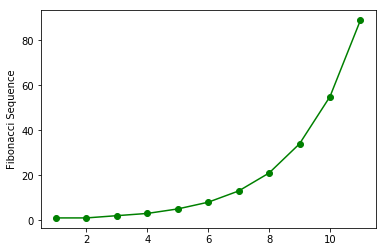

In [98]:
plt.show()

In [99]:
os.system('pwd')

0

In [104]:
import os
cwd = os.listdir()

In [105]:
cwd

['.DS_Store',
 '.ipynb_checkpoints',
 'bin',
 'facebook_reactions.py',
 'final_set_likes_date.csv',
 'include',
 'lib',
 'Reactions1.ipynb',
 'test.csv',
 'test2 - Copy (10).csv',
 'test2 - Copy (11).csv',
 'test2 - Copy (12).csv',
 'test2 - Copy (13).csv',
 'test2 - Copy (14).csv',
 'test2 - Copy (15).csv',
 'test2 - Copy (16).csv',
 'test2 - Copy (2).csv',
 'test2 - Copy (3).csv',
 'test2 - Copy (4).csv',
 'test2 - Copy (5).csv',
 'test2 - Copy (6).csv',
 'test2 - Copy (7).csv',
 'test2 - Copy (8).csv',
 'test2 - Copy (9).csv',
 'test2 - Copy.csv',
 'test2 - Copy3.csv',
 'test2.csv',
 'untitled folder',
 'untitled folder.zip',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [120]:
likes_list = []
dates_list=[]
with open('./final_set_likes_date.csv','r',newline='') as csvfile2:
    spamwriter = csv.reader(csvfile2,delimiter=',')
    for i in spamwriter:
        likes_list.append(i[0])
        dates_list.append(i[1])

plt.plot(likes_list,'go',linestyle="solid")

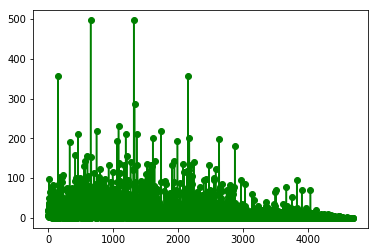

In [121]:
plt.show()